In [44]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
path = r'C:\Users\samar\Desktop\güz2024\data'  # Dosyaların bulunduğu dizin

# Dizin içindeki tüm CSV dosyalarını listele
all_files = glob.glob(path + "/*.csv")

# Her dosyayı okurken ilk satırı atla (skiprows=1 ile)
df_list = [pd.read_csv(f, skiprows=1) for f in all_files]

# Tüm DataFrame'leri birleştir
combined_df = pd.concat(df_list, ignore_index=True)
# Bütün kolonları float türüne çevir


In [50]:
combined_df

,Date,Opponent,Result,S,MP,Kills,Errors,Total Attacks,Hit Pct,Assists,Aces,SErr,Digs,RErr,Block Solos,Block Assists,BErr,PTS,BHE,Unnamed: 19
0,08/26/2016,"Sacramento St. @ Arlington, Texas",L 0 - 3,3,NaN,16,20,93,-0.043,16,2,1,30,7.0,NaN,8.0,3.0,22.0,2.0,NaN
1,08/27/2016,@ UT Arlington,L 0 - 3,3,NaN,19,29,92,-0.109,19,1,2,28,4.0,1.0,NaN,2.0,21.0,1.0,NaN
2,08/27/2016,"Sam Houston St. @ Arlington, Texas",L 0 - 3,3,NaN,23,10,86,0.151,22,2,5,30,8.0,NaN,4.0,6.0,27.0,2.0,NaN
3,09/02/2016,@ Little Rock,L 0 - 3,3,NaN,28,20,74,0.108,26,3,2,29,16.0,NaN,9.0,2.0,35.5,1.0,NaN
4,09/03/2016,"UT Martin @ Little Rock, Ark.",L 0 - 3,3,NaN,26,17,94,0.096,25,1,5,42,9.0,1.0,4.0,2.0,30.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,10/29/2016,Valparaiso,L 1 - 3,4,NaN,47,30,142,0.120,47,4,8,57,6.0,3,22.0,1,65.0,2.0,NaN
276,11/04/2016,@ Oakland,L 0 - 3,3,NaN,25,19,105,0.057,23,3,4,39,5.0,NaN,16.0,3,36.0,1.0,NaN
277,11/06/2016,@ Cleveland St.,L 0 - 3,3,NaN,38,20,112,0.161,36,5,4,34,3.0,1,4.0,3,46.0,NaN,NaN
278,11/09/2016,Northern Ky.,L 1 - 3,4,NaN,51,19,144,0.222,49,7,6,61,7.0,NaN,18.0,3,67.0,NaN,NaN


In [51]:
combined_df.drop(['MP','Unnamed: 19','Date','Opponent'],  axis='columns', inplace=True)


In [52]:
combined_df

,Result,S,Kills,Errors,Total Attacks,Hit Pct,Assists,Aces,SErr,Digs,RErr,Block Solos,Block Assists,BErr,PTS,BHE
0,L 0 - 3,3,16,20,93,-0.043,16,2,1,30,7.0,NaN,8.0,3.0,22.0,2.0
1,L 0 - 3,3,19,29,92,-0.109,19,1,2,28,4.0,1.0,NaN,2.0,21.0,1.0
2,L 0 - 3,3,23,10,86,0.151,22,2,5,30,8.0,NaN,4.0,6.0,27.0,2.0
3,L 0 - 3,3,28,20,74,0.108,26,3,2,29,16.0,NaN,9.0,2.0,35.5,1.0
4,L 0 - 3,3,26,17,94,0.096,25,1,5,42,9.0,1.0,4.0,2.0,30.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,L 1 - 3,4,47,30,142,0.120,47,4,8,57,6.0,3,22.0,1,65.0,2.0
276,L 0 - 3,3,25,19,105,0.057,23,3,4,39,5.0,NaN,16.0,3,36.0,1.0
277,L 0 - 3,3,38,20,112,0.161,36,5,4,34,3.0,1,4.0,3,46.0,NaN
278,L 1 - 3,4,51,19,144,0.222,49,7,6,61,7.0,NaN,18.0,3,67.0,NaN


In [53]:
df_no_result=combined_df.drop(['Result'],  axis='columns')
df_no_result = df_no_result.apply(pd.to_numeric, errors='coerce')

                      S     Kills    Errors  Total Attacks   Hit Pct  \
S              1.000000  0.733088  0.618765       0.838959 -0.063784   
Kills          0.733088  1.000000  0.338558       0.771512  0.439553   
Errors         0.618765  0.338558  1.000000       0.676648 -0.597642   
Total Attacks  0.838959  0.771512  0.676648       1.000000 -0.138631   
Hit Pct       -0.063784  0.439553 -0.597642      -0.138631  1.000000   
Assists        0.739984  0.986649  0.356007       0.770331  0.417502   
Aces           0.225476  0.179021  0.049051       0.092877  0.163459   
SErr           0.467453  0.409687  0.242689       0.355751  0.113352   
Digs           0.678641  0.699377  0.497876       0.882893 -0.004369   
RErr           0.209614 -0.055125  0.244812       0.126001 -0.346627   
Block Solos    0.063777  0.060578 -0.068735       0.029748  0.083488   
Block Assists  0.395119  0.391644  0.149549       0.336247  0.122072   
BErr           0.127975  0.179825  0.021449       0.168408  0.02

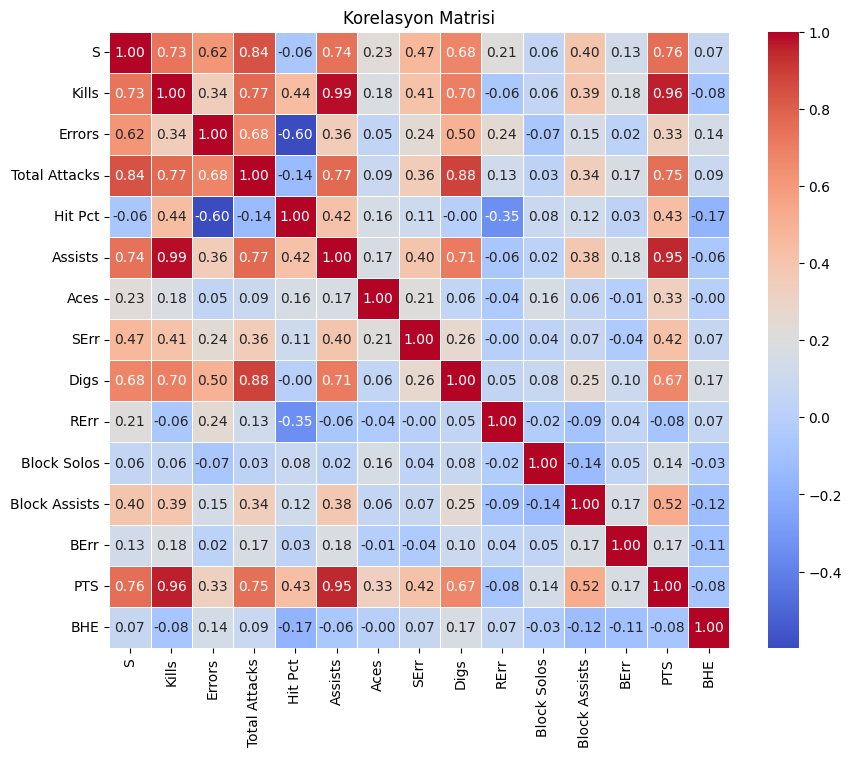

In [55]:
correlation_matrix = df_no_result.corr()

# Korelasyon matrisini yazdır
print(correlation_matrix)

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

* S (Sets Played): Bir takımın oynadığı set sayısını gösterir. Voleybol maçlarında genellikle 3 veya 5 set oynanır.

* Kills: Bir oyuncunun rakip takımın defansını aşarak, doğrudan sayı kazandıran hücum vuruşlarının sayısını gösterir. Yani, başarılı hücumlar.

* Errors: Bir oyuncunun hücum sırasında yaptığı hatalar. Bu, topun rakip takım tarafından kurtarılamayacak şekilde dışarıya gitmesi veya bloklanması gibi hataları içerir.

* Total Attacks: Bir oyuncunun toplam hücum denemelerinin sayısıdır. Kills ve Errors da dahil olmak üzere yapılan tüm hücumlar bu kategoriye girer.

* Hit Pct (Hit Percentage): Hücum yüzdesi. Kills sayısının, toplam hücum denemelerine (Total Attacks) bölünmesiyle elde edilir ve hücumların ne kadarının başarılı olduğunu gösterir. Yüksek bir yüzdelik, oyuncunun etkili bir hücum gücüne sahip olduğunu gösterir.

* Assists: Bir oyuncunun, takım arkadaşına hücum yapması için verdiği pas sayısını ifade eder. Bir oyuncu, topu takım arkadaşına ileterek onların sayı yapmasını sağlar.

* Aces: Bir oyuncunun servis sırasında doğrudan sayı kazandıran vuruşlarının sayısıdır. Rakip takımın servisi karşılayamaması durumunda ace sayılır.

* SErr (Serve Errors): Bir oyuncunun servis sırasında yaptığı hataların sayısıdır. Bu, servisin yanlış yere gitmesi veya servisin dışarı çıkması gibi durumları içerir.

* Digs: Bir oyuncunun rakip takımın hücumlarını başarılı bir şekilde karşılaması (topu rakip sahaya geçmeden önce kurtarma) sayısıdır.

* RErr (Reception Errors): Bir oyuncunun rakip servisini karşılamadığında yapılan hataların sayısıdır. Bu, topun yere düşmesi veya dışarı gitmesi gibi hataları içerir.

* Block Solos: Bir oyuncunun tek başına yaptığı başarılı blokların sayısıdır. Bu, rakip hücumunu tamamen engelleyen bir bloktur.

* Block Assists: Bir oyuncunun takım arkadaşıyla birlikte yaptığı blokların sayısıdır. Birden fazla oyuncu blok yaparsa, bu sayı her iki oyuncuya da yazılır.

* BErr (Block Errors): Bir oyuncunun blok yaparken yaptığı hataların sayısıdır. Bu, rakip takımın blokta başarılı olması veya oyuncunun hatalı bir blok yapması durumunda meydana gelir.

* PTS (Points): Bir oyuncunun veya takımın kazandığı toplam puan sayısıdır. Bu, hücumlardan, servislerden, bloklardan ve diğer oyun öğelerinden elde edilen puanları içerir.

* BHE (Ball Handling Errors): Bir oyuncunun topu kontrol ederken yaptığı hataların sayısıdır. Bu, özellikle pas verme veya topu düzgün bir şekilde tutma hatalarını içerir.

### Yorumlama
* Kills ve Assists arasında yüksek pozitif korelasyon (0.99): Voleybolda oyuuncular çoğu zaman asistle sayı kazanılıyormuş bu korelasyon şaşırtmadı çünkü voleybol paslaşmaya dayanan bir oyundur.
* PTS ve Kills arasında yüksek pozitif korelasyon (0.96): Kills sayısı ile toplam puanlar (PTS) arasında güçlü bir ilişki vardır. Bu, bir takımın veya oyuncunun kazandığı puanların büyük kısmının doğrudan hücumlardan (kills) geldiğini gösterir.
* Total Attacks ile Kills arasındaki pozitif korelasyon (0.84): Toplam hücumlar (Total Attacks) ile öldürme sayısı (Kills) arasındaki pozitif korelasyon, bir oyuncunun veya takımın hücum yapma sıklığının, başarılı hücumlarla (Kills) doğrudan ilişkili olduğunu gösterir.